In [53]:
from utils import collect
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
path = Path("/work/dlclarge2/hoffmaja-pruneshift/experiments/img100/workshop/pruning")
path_baseline = Path("/work/dlclarge2/hoffmaja-pruneshift/experiments/img100/workshop/baselines/")
scaled_path = Path("/work/dlclarge2/hoffmaja-pruneshift/experiments/img100/basemodels/scaled_resnet18/")
path_kd = Path("/work/dlclarge2/hoffmaja-pruneshift/experiments/img100/analysis/knowledge/")
sns.set_context("talk")
sns.set_style("ticks")

In [54]:
df = collect(path)
df_baseline = collect(path_baseline).query("Scaling == 1")
df_scaled = collect(scaled_path).query("Augmix == False").append(df_baseline.query("Network == 'resnet18'"))
df_kd = collect(path_kd)

In [55]:
df_scaled

,Amda,Augmix,DeepAugment,ImageNet100 Error,ImageNet100-C Error,ImageNet100-R Error,Loss,Network,Path,Scaling
270,False,False,False,0.1004,0.473624,0.665804,StandardLoss,resnet18,/work/dlclarge2/hoffmaja-pruneshift/experiment...,2.0
270,False,False,False,0.0928,0.469701,0.666839,StandardLoss,resnet18,/work/dlclarge2/hoffmaja-pruneshift/experiment...,2.5
270,False,False,False,0.1004,0.460717,0.668973,StandardLoss,resnet18,/work/dlclarge2/hoffmaja-pruneshift/experiment...,3.0
270,False,False,False,0.0934,0.455067,0.665869,StandardLoss,resnet18,/work/dlclarge2/hoffmaja-pruneshift/experiment...,3.5
270,False,False,False,0.0946,0.458963,0.671883,StandardLoss,resnet18,/work/dlclarge2/hoffmaja-pruneshift/experiment...,4.0
270,False,False,False,0.1174,0.511125,0.686692,StandardLoss,resnet18,/work/dlclarge2/hoffmaja-pruneshift/experiment...,1.0


In [56]:
df_scaled_ = pd.melt(df_scaled, id_vars=["Scaling"], value_vars=["ImageNet100 Error", "ImageNet100-C Error", "ImageNet100-R Error"], var_name="Error Type", value_name="Error")

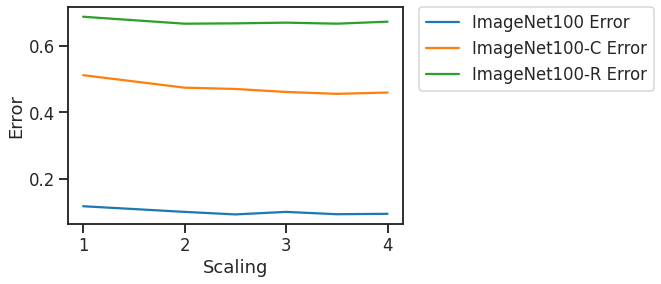

In [57]:
sns.lineplot(data=df_scaled_, x="Scaling", y="Error", hue="Error Type")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [58]:
df_mnas = df.query("Network == 'mnasnet'") # .append(df_baseline.query("Network == 'mnasnet1_0'"))

In [59]:
df_mnas["Method"] = "prune: " + df_mnas["Prune Method"]

<ipython-input-59-8d90dcd70c22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mnas["Method"] = "prune: " + df_mnas["Prune Method"]


In [60]:
df_kd["Method"] = "distill: " + df_kd["Loss"]

In [61]:
df_comb = pd.concat([df_mnas, df_kd])

In [1]:
errors = ["ImageNet100 Error", "ImageNet100-R Error", "ImageNet100-C Error"]
for e in errors:
    df_comb["Δ " + e] = 0
    
for idx in range(len(df_comb)):
    for e in errors:
        net = df_comb.iloc[idx]["Network"]
        net = "mnasnet1_0"
        df_comb["Δ " + e].iloc[idx] = df_baseline.query(f"Network == '{net}'")[e].item() - df_comb.iloc[idx][e]

NameError: name 'df_comb' is not defined

In [63]:
df_comb = pd.melt(df_comb, id_vars=["Method"], value_vars=["Δ " + e for e in errors], var_name="Error Type", value_name="Error")

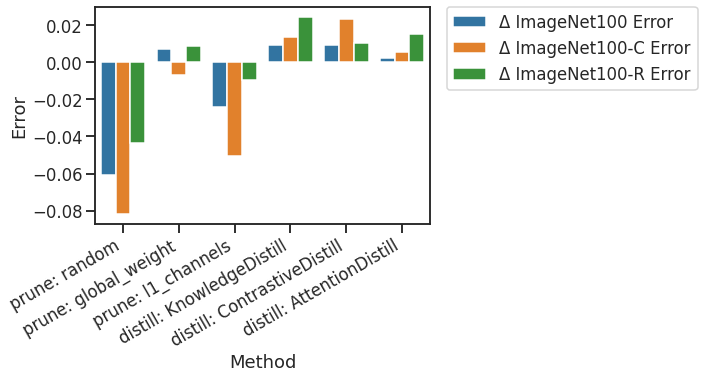

In [64]:
ax = sns.barplot(x="Method", y="Error", hue="Error Type", data=df_comb)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)